In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle


%matplotlib inline

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
test_file = 'traffic-signs-data/test.p'
train_file = 'traffic-signs-data/train.p'

with open(train_file, mode='rb') as file:
    train = pickle.load(file)

with open(test_file, mode='rb') as file:
    test = pickle.load(file)


In [3]:
from keras.datasets import cifar10
import csv

names = 'traffic-signs-data/signnames.csv'
with open(names, mode='r') as file:
    infile = csv.reader(file)
    label_dic = {info[0]:info[1] for info in infile}


Using TensorFlow backend.


In [4]:
X_tr, Y_tr = train['features'], train['labels']
X_te, Y_te = test['features'], test['labels']
n_labels = len(set(Y_tr))

print('Shape of training data inputs : {}'.format(X_tr.shape))
print('Shape of training data labels:  {}'.format(Y_tr.shape))
print('Number of labels:               {}'.format(n_labels))



Shape of training data inputs : (39209, 32, 32, 3)
Shape of training data labels:  (39209,)
Number of labels:               43


In [5]:
classes, indexes, class_count = np.unique(Y_tr, return_index=True, return_counts=True)
classes, indexes, class_count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8),
 array([    0,   210,  2430,  4680,  6090,  8070,  9930, 10350, 11790,
        13200, 14670, 16680, 18000, 20100, 22260, 23040, 23670, 24090,
        25200, 26400, 26610, 26970, 27300, 27690, 28200, 28470, 29970,
        30570, 30810, 31350, 31620, 32070, 32850, 33090, 33779, 34199,
        35399, 35789, 35999, 38069, 38369, 38729, 38969]),
 array([ 210, 2220, 2250, 1410, 1980, 1860,  420, 1440, 1410, 1470, 2010,
        1320, 2100, 2160,  780,  630,  420, 1110, 1200,  210,  360,  330,
         390,  510,  270, 1500,  600,  240,  540,  270,  450,  780,  240,
         689,  420, 1200,  390,  210, 2070,  300,  360,  240,  240]))

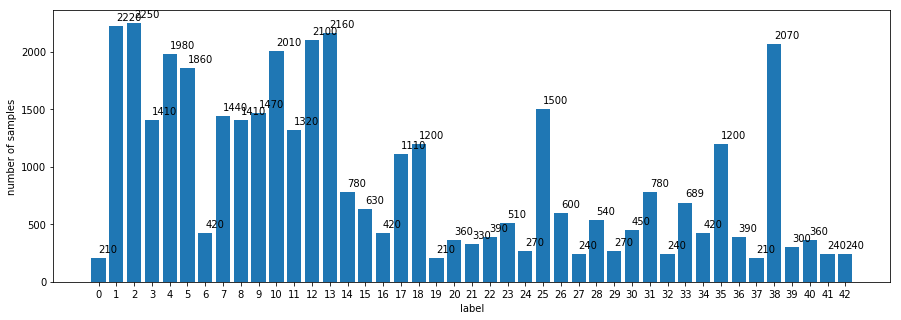

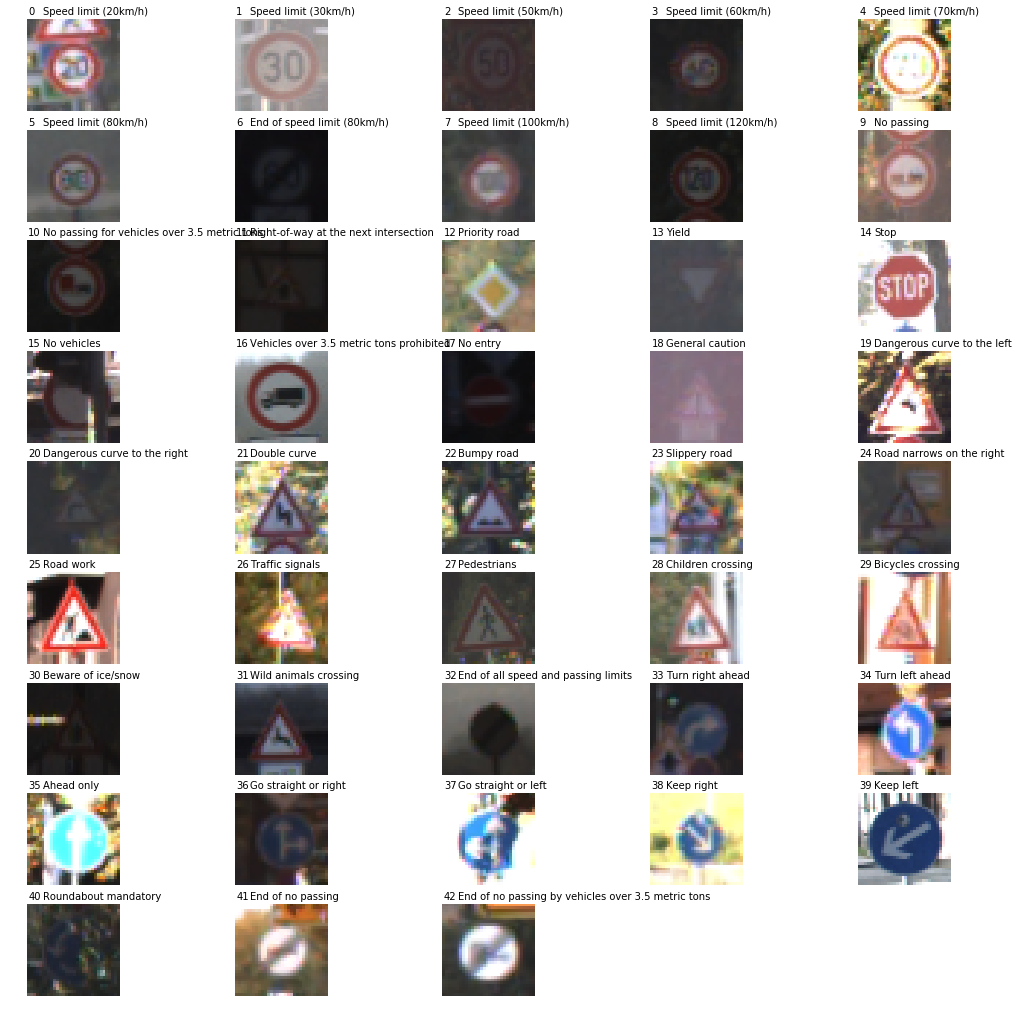

In [10]:
import matplotlib.gridspec as gridspec

def plot_images():
    gs = gridspec.GridSpec(10, 5)
    plt.figure(figsize=(18, 20))
    n = 0
    for index in indexes:
        ax = plt.subplot(gs[n])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        img = X_tr[index]
        plt.subplot(10, 5, n+1)
        label=str(Y_tr[index])
        plt.text(0, -2, label)
        plt.text(5, -2, label_dic[label])
        plt.imshow(img)
        plt.axis('off')
        n+=1
    plt.show()

def plot_data_labels():
    plt.figure(figsize=(15, 5))
    plt.bar(classes, class_count)
    plt.xlabel('label')
    plt.xticks(classes)
    plt.ylabel('number of samples')
    for i, j in zip(classes, class_count):
        plt.text(i, j+50, str(j))
    plt.show()

plot_data_labels()
plot_images()


In [13]:
import cv2
def normalize_images(img):
    img = cv2.normalize(img, img, 50, 200, cv2.NORM_MINMAX)
    cv2.medianBlur(img, 3)
    return img

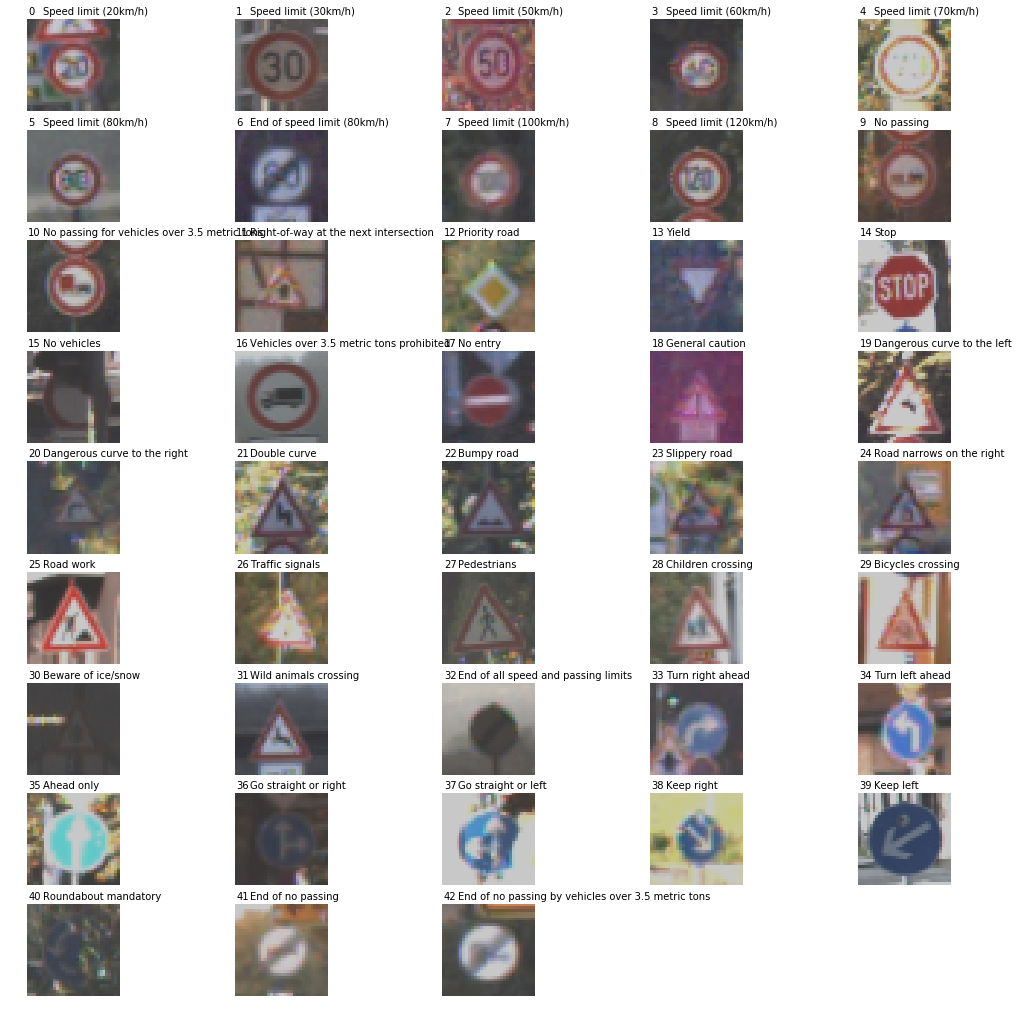

In [14]:
length = len(X_tr)

for i in range(length):
    normalize_images(X_tr[i])
    
for j in range(length):
    normalize_images(X_tr[j])
    
plot_images()    

# Building our network

In [32]:
def weight_var(shape):
    w = tf.truncated_normal(shape=shape, mean=0, stddev=0.1)
    return tf.Variable(w)

def bias_var(shape):
    return tf.Variable(tf.zeros(shape))



def cnn(x):
    filter_height = 3
    filter_width = 3
    stride = 1
    strides = [1, 1, 1, 1]
    ksize = [1, 2, 2, 1]
    strides2 = ksize
    # 1 layer
    w1 = weight_var(shape=[filter_height, filter_width, 3, 6])
    b1 = bias_var(6)
    x = tf.nn.conv2d(x, w1, strides=strides, padding='VALID')
    x = tf.nn.bias_add(x, b1)
    x = tf.nn.relu(x)
    
    # 2 layer
    w2 = weight_var(shape=[filter_height, filter_width, 6, 9])
    b2 = bias_var(9)
    x = tf.nn.conv2d(x, w2, strides=strides, padding='VALID')
    x = tf.nn.bias_add(x, b2)
    x = tf.nn.relu(x)
    
    x = tf.nn.max_pool(x, ksize=ksize, strides=strides2, padding='VALID')
    
    
    # 3 layer
    w3 = weight_var(shape=[filter_height, filter_width, 9, 12])
    b3 = bias_var(12)
    x = tf.nn.conv2d(x, w3, strides=strides, padding='VALID')
    x = tf.nn.bias_add(x, b3)
    x = tf.nn.relu(x)
    
    # 4 layer
    w4 = weight_var(shape=[filter_height, filter_width, 12, 16])
    b4 = bias_var(16)
    x = tf.nn.conv2d(x, w4, strides=strides, padding='VALID')
    x = tf.nn.bias_add(x, b4)
    x = tf.nn.relu(x)
    
    x = tf.nn.max_pool(x, ksize=ksize, strides=strides2, padding='VALID')
    
    # flatten 
    x = tf.contrib.layers.flatten(x)
    
    # Fully connected layer
    w_fc = weight_var(shape=[400, 220])
    b_fc = bias_var(220)
    x = tf.add(tf.matmul(x, w_fc), b_fc)
    x = tf.nn.relu(x)
    
    w_fc = weight_var(shape=[220, n_labels])
    b_fc = bias_var(n_labels)
    logits = tf.add(tf.matmul(x, w_fc), b_fc)
    return logits
    

In [68]:
def train(X_batch, Y_batch):
    total_loss = 0
    total_acc = 0
    samples = len(X_batch)
    sess = tf.get_default_session()
    for offset in range(0, samples, batch_size):
        end = offset+batch_size
        xs_batch, ys_batch = X_batch[offset:end], Y_batch[offset:end]
        loss_, acc = sess.run([loss, accuracy], feed_dict={x:xs_batch, y:ys_batch})
        total_loss += (float(loss_)*xs_batch.shape[0])
        total_acc += (float(acc)*xs_batch.shape[0])

    return (total_loss)/samples, (total_acc)/samples
    

In [69]:
# Split data for training and validation
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, Y_train = shuffle(X_tr, Y_tr)

X_tr, X_val, Y_tr, Y_val = train_test_split(X_tr, Y_tr, test_size=0.3, random_state=0)



In [70]:
from IPython.display import Image


In [81]:
tf.reset_default_graph()
sess = tf.Session()

epochs = 40
batch_size = 512
learning_rate = 1e-3

x = tf.placeholder(tf.float32, shape=(None, 32, 32, 3))
y = tf.placeholder(tf.int32, shape=(None))

y_hot = tf.one_hot(y, n_labels)


In [82]:
# train network
logits = cnn(x)

# Optimize Network

In [83]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_hot))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_hot, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))


In [84]:
init = tf.global_variables_initializer()
sess.run(init)

Initializing Training
EPOCH 1
Validation Loss = 1.742 and Validation Accuracy = 53.036 %
EPOCH 2
Validation Loss = 0.546 and Validation Accuracy = 84.212 %
EPOCH 3
Validation Loss = 0.284 and Validation Accuracy = 91.863 %
EPOCH 4
Validation Loss = 0.217 and Validation Accuracy = 93.175 %
EPOCH 5
Validation Loss = 0.119 and Validation Accuracy = 96.709 %
EPOCH 6
Validation Loss = 0.109 and Validation Accuracy = 96.794 %
EPOCH 7
Validation Loss = 0.103 and Validation Accuracy = 96.745 %
EPOCH 8
Validation Loss = 0.058 and Validation Accuracy = 98.494 %
EPOCH 9
Validation Loss = 0.053 and Validation Accuracy = 98.312 %
EPOCH 10
Validation Loss = 0.035 and Validation Accuracy = 99.138 %
EPOCH 11
Validation Loss = 0.028 and Validation Accuracy = 99.296 %
EPOCH 12
Validation Loss = 0.027 and Validation Accuracy = 99.235 %
EPOCH 13
Validation Loss = 0.019 and Validation Accuracy = 99.538 %
EPOCH 14
Validation Loss = 0.013 and Validation Accuracy = 99.794 %
EPOCH 15
Validation Loss = 0.011 an

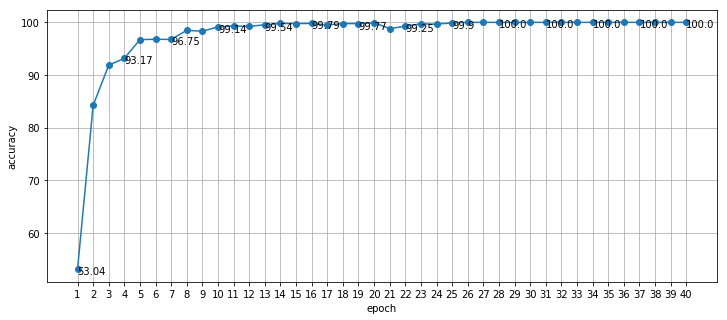

In [85]:

acc_map = []


samples = len(X_tr)
print("Initializing Training")
try:
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        for epoch in range(epochs):
            X_train, Y_train = shuffle(X_train, Y_train)
            for offset in range(0, samples, batch_size):
                end = offset+batch_size
                xs_batch, ys_batch = X_train[offset:end], Y_train[offset:end]
                loss_, _, acc_ = sess.run([loss, optimizer, accuracy], feed_dict={x: xs_batch, y: ys_batch})
                
            validation_loss, validation_acc = train(X_val, Y_val)
            # acc map
            acc_map.append(round(validation_acc*100, 2))
            print("EPOCH {}".format(epoch + 1))
            print ("Validation Loss = {:.3f} and Validation Accuracy = {:.3f} %".format(validation_loss, 100 *validation_acc))
        plt.figure(figsize=(12, 5))
        plt.xticks(range(1, epochs+1))
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.grid(True)
        plt.plot(range(1, epochs+1), acc_map, '-o')
        for i, j in list(zip(range(1, EPOCHS+1), acc_map))[0::3]:
            plt.text(i, j-1, str(j))
        
    
except KeyboardInterrupt:
    print('Training interrupted')

In [86]:
def plot_new_images(img, x, y, labels):
    gs = gridspec.GridSpec(x, y)
    plt.figure(figsize=(18, 20))
    n = 0
    for index in range(len(img)):
        ax = plt.subplot(gs[n])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        image = X_tr[index]
        plt.subplot(x, y, n+1)
        label=str(labels[index])
        plt.text(0, -2, label)
        #plt.text(5, -2, label_dic[label])
        plt.imshow(image)
        plt.axis('off')
        n+=1
    plt.show()